In [1]:
# importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sbn

In [ ]:
# carregando dados
dadosRH = pd.read_csv('dadosRH.csv')

In [ ]:
# cabeçalho
dadosRH.head()

# linhas e colunas
dadosRH.shape

In [ ]:
# Análise exploratória, Limpeza e transformação #

In [ ]:
# Verificando se há valores nulos nas colunas
dadosRH.isnull().sum()

# 2 colunas com valores nulos necessário limpeza 'ediucacao', 'aval_ano_anterior'

In [ ]:
dadosRH.groupby(['educacao']).count()

In [ ]:
sbn.countplot(dadosRH['educacao'])

In [ ]:
dadosRH.groupby(['aval_ano_anterior']).count()

In [ ]:
sbn.countplot(dadosRH['aval_ano_anterior'])

In [ ]:
# Preencher valores ausentes #

In [ ]:
#tabela['coluna'].fillna(tabela['coluna'].mode[0], inplace = True) # preencher valores ausentes com a moda

dadosRH['educacao'].fillna(dadosRH['educacao'].mode()[0], inplace = True)

In [ ]:
#tabela['coluna'].fillna(tabela['coluna'].median(), inplace = True) # preencher valores ausentes com a media, 

dadosRH['aval_ano_anterior'].fillna(dadosRH['aval_ano_anterior'].median(), inplace = True)

In [ ]:
dadosRH.isnull().sum()

In [ ]:
dadosRH.groupby(['promovido']).count()

In [ ]:
sbn.countplot(dadosRH['promovido'])

In [ ]:
# desbalanceamento e balanceamento de classe, caso fosse treinar o modelo para machine learning

In [ ]:
df_classe_majoritaria = dadosRH[dadosRH.promovido == 0]
df_classe_minoritaria = dadosRH[dadosRH.promovido == 1]

In [ ]:
df_classe_majoritaria.shape
df_classe_minoritaria.shape

In [ ]:
# n_samples = maxiomo de dados
from sklearn.utils import resample
df_classe_minoritaria_upsampled = resample(df_classe_minoritaria, replace = True, n_samples = 50140, random_state = 150)

In [ ]:
dadosRH_balanceados = pd.concat([df_classe_majoritaria, df_classe_minoritaria_upsampled])

In [ ]:
dadosRH_balanceados.promovido.value_counts()

In [ ]:
sbn.countplot(dadosRH_balanceados['promovido'])

In [ ]:
# Grava um arquivo em disco após limpeza e transformação

dadosRH_balanceados.to_csv('dadosRH_modificados.csv', encoding = 'utf-8', index = False)

In [2]:
dataset = pd.read_csv('dadosRH_modificados.csv')

In [3]:
dataset.shape

(100280, 11)

In [ ]:
# Construindo gráficos

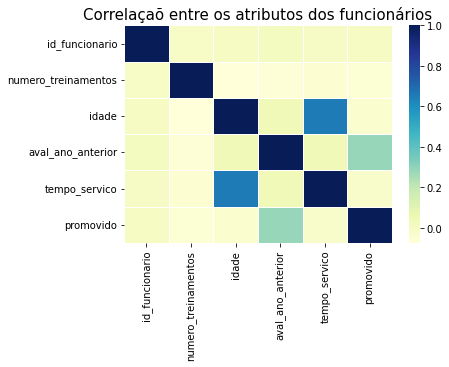

In [79]:
# 1-Correlação entre os atributos dos funcionários

import matplotlib.pyplot as plt
import seaborn as sns
correlacao = dataset.corr()
sns.heatmap(correlacao, cmap = 'YlGnBu', linewidths = 0.5) # dataset, cmap(cor), linewidths(espaço entre os quadrados)
plt.title('Correlaçaõ entre os atributos dos funcionários', fontsize = 15)
plt.show() # exibe o grafico

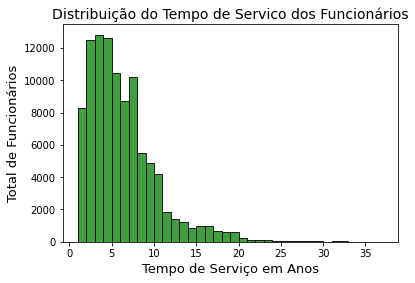

In [92]:
# 2-Tempo de serviço da maioria dos funcionarios

import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(dataset['tempo_servico'], color = 'green', binwidth = 1)
plt.title('Distribuição do Tempo de Servico dos Funcionários', fontsize = 14)
plt.xlabel('Tempo de Serviço em Anos', fontsize = 13)
plt.ylabel('Total de Funcionários', fontsize = 13)
plt.show()


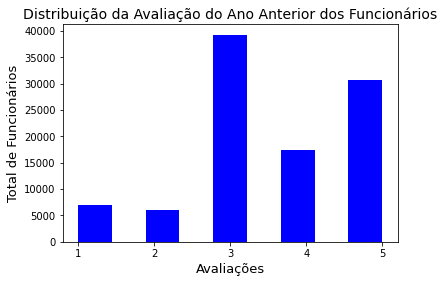

In [15]:
# 3- Qual avaliação do ano anterior foi mais comum 

import matplotlib.pyplot as plt
import seaborn as sbn
dataset['aval_ano_anterior'].hist(bins = 9, color = 'blue')
#dataset['aval_ano_anterior'].value_counts().sort_values().plot.bar(color = 'blue', figsize = (7,5))
eixoX = (1, 2, 3, 4, 5) # Define legenda eixo X
plt.title('Distribuição da Avaliação do Ano Anterior dos Funcionários', fontsize = 14)
plt.xlabel('Avaliações', fontsize = 13)
plt.grid(False)
plt.xticks(eixoX)
plt.ylabel('Total de Funcionários', fontsize = 13)
plt.show()

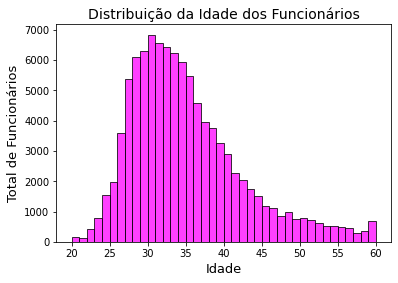

In [14]:
import matplotlib.pyplot as plt
import seaborn as sbn
sbn.histplot(dataset['idade'], color = 'magenta', binwidth = 1)
plt.title('Distribuição da Idade dos Funcionários', fontsize = 14)
plt.xlabel('Idade', fontsize = 13)
plt.ylabel('Total de Funcionários', fontsize = 13)
plt.show()

C:\Users\guga_\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


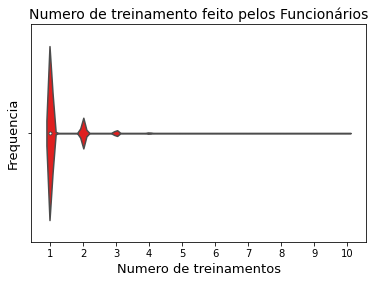

In [19]:
import matplotlib.pyplot as plt
import seaborn as sbn
sbn.violinplot(dataset['numero_treinamentos'], color = 'red')
contador = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
plt.title('Numero de treinamentos feito pelos Funcionários', fontsize = 14)
plt.xlabel('Numero de treinamentos', fontsize = 13)
plt.xticks(contador)
plt.ylabel('Frequencia', fontsize = 13)
plt.show()

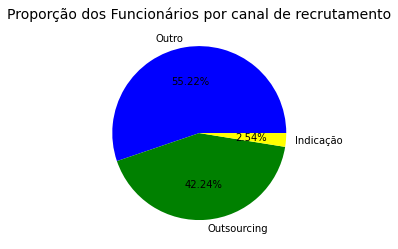

In [22]:
import matplotlib.pyplot as plt
import seaborn as sbn
dataset['canal_recrutamento'].value_counts()
fatias = [55375, 42358, 2547]
labels = 'Outro', 'Outsourcing', 'Indicação'
colors = ['blue', 'green', 'yellow']
explode = [0, 0, 0]
plt.pie(fatias, labels = labels, colors = colors, explode = explode, autopct = '%.2f%%')
plt.title('Proporção dos Funcionários por canal de recrutamento', fontsize = 14)
plt.axis('off')
#plt.legend()
plt.show()

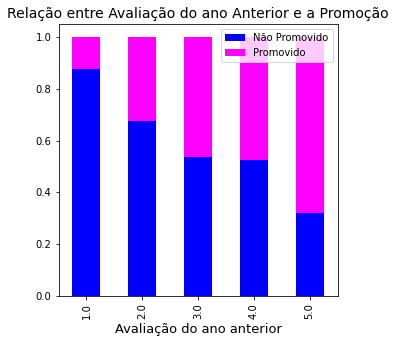

In [47]:
import matplotlib.pyplot as plt
import seaborn as sbn
data = pd.crosstab(dataset['aval_ano_anterior'], dataset['promovido'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (5, 5), color = ['blue', 'magenta'])
plt.title('Relação entre Avaliação do ano Anterior e a Promoção', fontsize = 14)
plt.xlabel('Avaliação do ano anterior', fontsize = 13)
mylabels = ('Não Promovido', 'Promovido')
plt.legend(labels = mylabels)
plt.show()